In [54]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
%matplotlib inline

In [15]:
iris = datasets.load_iris()
X_data = iris.data


X = pd.DataFrame(X_data, columns = iris.feature_names) 
Y = pd.DataFrame(iris.target, columns = ['Species'])

In [45]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y['Species'], test_size = 0.3, shuffle=True, random_state=3)

# K　=　3
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train, Y_train)

KNeighborsClassifier(n_neighbors=3)

In [46]:
# 性能評価
from sklearn.metrics import accuracy_score, precision_score, recall_score

In [47]:
Y_pred = knn.predict(X_test)

print("正解率：" + str(round(accuracy_score(Y_test, Y_pred), 3)))
print("適合率：" + str(round(precision_score(Y_test, Y_pred, average='macro'), 3)))
print("再現率：" + str(round(recall_score(Y_test, Y_pred, average='macro'), 3)))

正解率：0.956
適合率：0.958
再現率：0.952


「k=9」の時、正解率は最大値「97.8%をとる」


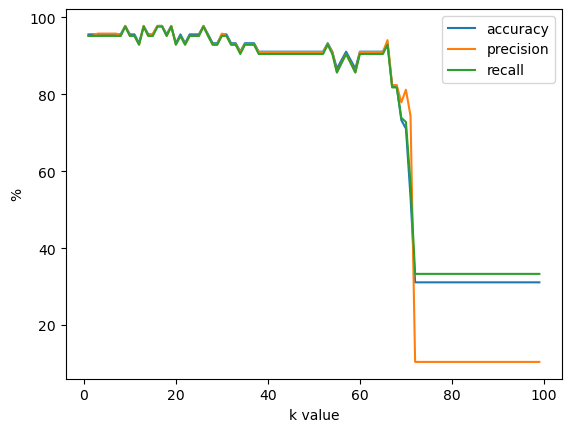

In [76]:
# K=1~99での正解率、適合率、再現率

accuracy  = []
precision = []
recall    = []

k_range = range(1,100)

for k in k_range:
    
    # k=kのインスタンス作成
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, Y_train)
    
    #性能評価
    Y_pred = knn.predict(X_test)
    accuracy.append(round(accuracy_score(Y_test, Y_pred), 3)*100)
    precision.append(round(precision_score(Y_test, Y_pred, average='macro', zero_division=0), 3)*100)
    recall.append(round(recall_score(Y_test, Y_pred, average='macro'), 3)*100)

#グラフ
plt.plot(k_range, accuracy, label='accuracy')
plt.plot(k_range, precision, label='precision')
plt.plot(k_range, recall, label='recall')
plt.legend(loc='best')
plt.xlabel('k value')
plt.ylabel('%')


#結果

#正解率が最大の数値を抽出
max_accuracy = max(accuracy)

#accuracy(list)に最大値のインデックスを抽出
index = accuracy.index(max_accuracy)

#正解率が最大の時のKの値
best_k_range = k_range[index]

print(f'「k={str(best_k_range)}」の時、正解率は最大値「{max_accuracy}%をとる」')